In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model        # For functional API models (if needed)
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = [224, 224]

In [9]:
train_directory='D:/autism early sathyabhama/autism/autsim mri/TRAIN/'
test_directory='D:/autism early sathyabhama/autism/autsim mri/TEST/'
val_directory='D:/autism early sathyabhama/autism/autsim mri/VAL'

In [7]:


 
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [10]:
  # useful for getting number of classes
folders = glob('D:/autism early sathyabhama/autism/autsim mri/TRAIN/*')
len(folders)

2

In [11]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [15]:
print(len(training_set))
print(len(test_set))

8
8


In [16]:
from  scipy import ndimage

In [17]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=19,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/19
8/8 ━━━━━━━━━━━━━━━━━━━━ 79s 10s/step - accuracy: 0.5541 - loss: 0.7784 - val_accuracy: 0.7866 - val_loss: 0.4873
Epoch 2/19
8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 10s/step - accuracy: 0.7796 - loss: 0.4478 - val_accuracy: 0.8498 - val_loss: 0.3286
Epoch 3/19
8/8 ━━━━━━━━━━━━━━━━━━━━ 71s 9s/step - accuracy: 0.8225 - loss: 0.3597 - val_accuracy: 0.8814 - val_loss: 0.2950
Epoch 4/19
8/8 ━━━━━━━━━━━━━━━━━━━━ 70s 9s/step - accuracy: 0.8772 - loss: 0.3045 - val_accuracy: 0.8419 - val_loss: 0.3500
Epoch 5/19
8/8 ━━━━━━━━━━━━━━━━━━━━ 72s 10s/step - accuracy: 0.8753 - loss: 0.3299 - val_accuracy: 0.8893 - val_loss: 0.2448
Epoch 6/19
8/8 ━━━━━━━━━━━━━━━━━━━━ 75s 10s/step - accuracy: 0.8655 - loss: 0.2525 - val_accuracy: 0.9328 - val_loss: 0.1554
Epoch 7/19
8/8 ━━━━━━━━━━━━━━━━━━━━ 75s 10s/step - accuracy: 0.9103 - loss: 0.2206 - val_accuracy: 0.9565 - val_loss: 0.1489
Epoch 8/19
8/8 ━━━━━━━━━━━━━━━━━━━━ 76s 10s/step - accuracy: 0.9656 - loss: 0.1243 - val_accuracy: 0.9684 - val_loss: 0.1085
Ep

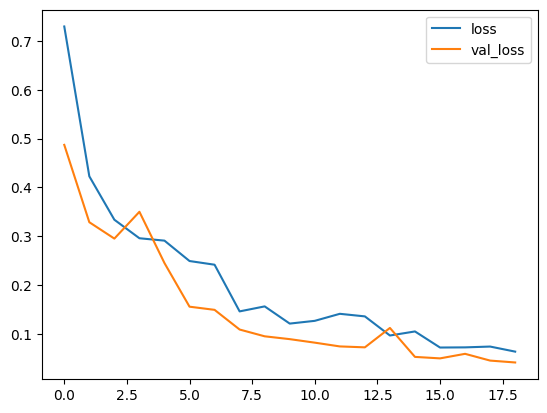

In [18]:
# loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

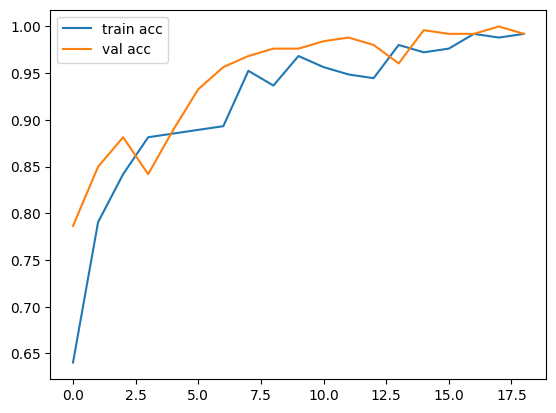

In [19]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [21]:
model.save('BC.h5')

In [16]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('./BC.h5',compile=False)  

In [17]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [18]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

In [19]:
import tensorflow as tf
import keras as k
print(tf.__version__)
print(k.__version__)

2.18.0
3.7.0


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Paths to the dataset (update according to your environment)
dataset_path ='F:/Vignesh/Image processing/tomato leaf/tomato/train/'  # Provide the path to the dataset

# Preprocessing using ImageDataGenerator for augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Loading the dataset into train and validation generators
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Create a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_gen.class_indices), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_gen, epochs=10, validation_data=val_gen)

# Evaluate the model on validation data
y_true = val_gen.classes  # True labels
y_pred = model.predict(val_gen, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix using matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_gen.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.show()
